In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../01.Data_Collection/films.csv')

print(df.shape)
df.sample()

(839, 34)


,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,배역명,영화코드,배우코드,주연배우,역할_배우,배우성별,작가,작가코드,대표작가,역할_시나리오(각본),작가성별,F-rated,감독코드,대표감독,역할_감독,감독성별
411,126.0,파밍 보이즈,2017.7.13,"20,671,200",0.0%,"20,671,200","3,056","3,056",24,330,한국,한국,(주)콘텐츠나무,(주)영화사 진진,전체관람가,다큐멘터리,"장세정,변시연,강호준","권두현,김하석,유지황,박준하,유지은,유지황,이민욱,이수현,이인호,이주환",NaN,20160746.0,20291255.0,권두현,배우,남자,NaN,NaN,NaN,NaN,NaN,1,20189617.0,변시연,감독,여자


In [6]:
df.dtypes

순위             float64
영화명             object
개봉일             object
매출액             object
매출액점유율          object
누적매출액           object
관객수             object
누적관객수           object
스크린수            object
상영횟수            object
대표국적            object
국적              object
제작사             object
배급사             object
등급              object
장르              object
감독              object
배우              object
배역명             object
영화코드            object
배우코드           float64
주연배우            object
역할_배우           object
배우성별            object
작가              object
작가코드           float64
대표작가            object
역할_시나리오(각본)     object
작가성별            object
F-rated          int64
감독코드           float64
대표감독            object
역할_감독           object
감독성별            object
dtype: object

In [7]:
# corr 보기 위해 숫자로 표현된 컬럼만 남기기 + 식별을 위해 영화명, 영화코드 포함
df_in_digit = df[['영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수', 'F-rated']]
df_in_digit = df_in_digit[df_in_digit['개봉일'].notnull()]
print(df_in_digit.isnull().sum())
print(df_in_digit.shape)
df_in_digit.sample()

영화명        0
영화코드       0
개봉일        0
매출액        0
매출액점유율     0
누적매출액      0
관객수        0
누적관객수      0
스크린수       0
상영횟수       0
F-rated    0
dtype: int64
(808, 11)


,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated
681,증인,20185881.0,2019.2.13,"20,477,862,331",2.6%,"20,477,862,331","2,534,175","2,534,175","1,047","89,557",0


In [8]:
# 컬럼 dtype 변경
# 매출액, 매출액점유율, 누적매출액, 관객수, 누적관객수, 스크린수, 상영횟수 -> int
columns = ['매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']

for c in columns:
    print(c)
    print(df_in_digit[c].dtype)
    if c == '매출액점유율': df_in_digit[c] = df_in_digit[c].apply(lambda x: float(x.replace('%','')))
    else:
        df_in_digit[c] = df_in_digit[c].apply(lambda x: int(x.replace(',', '').replace('%','')))
    
df_in_digit.dtypes

매출액
object
매출액점유율
object
누적매출액
object
관객수
object
누적관객수
object
스크린수
object
상영횟수
object


영화명         object
영화코드        object
개봉일         object
매출액          int64
매출액점유율     float64
누적매출액        int64
관객수          int64
누적관객수        int64
스크린수         int64
상영횟수         int64
F-rated      int64
dtype: object

In [9]:
df_in_digit['개봉일'] = pd.to_datetime(df_in_digit['개봉일'])
df_in_digit['year'] = pd.to_datetime(df_in_digit['개봉일']).dt.year
df_in_digit['month'] = pd.to_datetime(df_in_digit['개봉일']).dt.month
df_in_digit['day'] = pd.to_datetime(df_in_digit['개봉일']).dt.day
df_in_digit['dayofweek'] = pd.to_datetime(df_in_digit['개봉일']).dt.dayofweek

In [10]:
df_in_digit.corr()

,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
매출액,1.000000,0.997869,1.000000,0.999190,0.999192,0.776339,0.944985,-0.117557,0.013476,0.015759,-0.029194,-0.286490
매출액점유율,0.997869,1.000000,0.997875,0.995656,0.995667,0.772840,0.945209,-0.117623,0.025950,0.010284,-0.024255,-0.283503
누적매출액,1.000000,0.997875,1.000000,0.999187,0.999190,0.776384,0.945012,-0.117526,0.013537,0.015649,-0.029256,-0.286543
관객수,0.999190,0.995656,0.999187,1.000000,0.999999,0.775784,0.942876,-0.117042,0.003467,0.017222,-0.028603,-0.286909
누적관객수,0.999192,0.995667,0.999190,0.999999,1.000000,0.775841,0.942915,-0.116990,0.003546,0.017092,-0.028675,-0.286970
스크린수,0.776339,0.772840,0.776384,0.775784,0.775841,1.000000,0.876827,-0.121113,0.130484,-0.011587,-0.002000,-0.447734
상영횟수,0.944985,0.945209,0.945012,0.942876,0.942915,0.876827,1.000000,-0.113023,0.048943,-0.014570,-0.020723,-0.347923
F-rated,-0.117557,-0.117623,-0.117526,-0.117042,-0.116990,-0.121113,-0.113023,1.000000,0.047348,-0.006891,0.002593,0.054074
year,0.013476,0.025950,0.013537,0.003467,0.003546,0.130484,0.048943,0.047348,1.000000,-0.126272,0.030652,-0.158594
month,0.015759,0.010284,0.015649,0.017222,0.017092,-0.011587,-0.014570,-0.006891,-0.126272,1.000000,-0.055615,0.058097


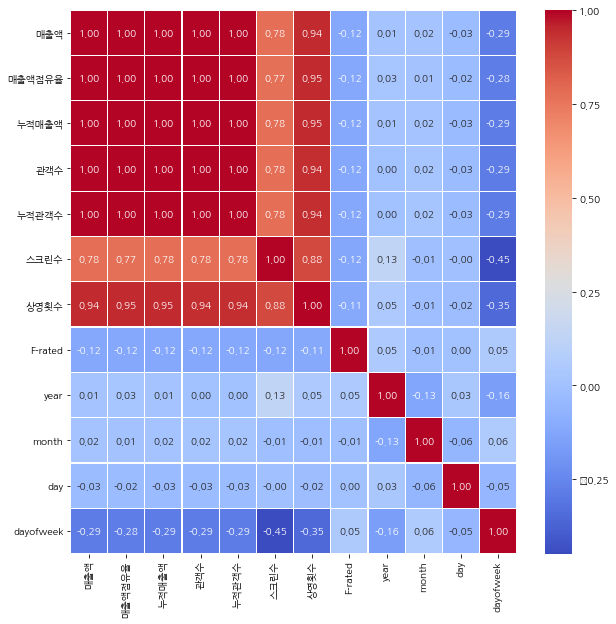

In [11]:
plt.figure(figsize=[10, 10])
sns.heatmap(df_in_digit.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

### 상영횟수 분포

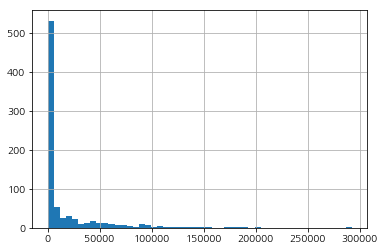

In [18]:
df_in_digit['상영횟수'].hist(bins=50)

In [13]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우', '배역명',
       '영화코드', '배우코드', '주연배우', '역할_배우', '배우성별', '작가', '작가코드', '대표작가',
       '역할_시나리오(각본)', '작가성별', 'F-rated', '감독코드', '대표감독', '역할_감독', '감독성별'],
      dtype='object')

In [14]:
df_in_digit['상영횟수(log)'] = df_in_digit['상영횟수'].apply(lambda x: np.log(x))

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log)
232,짐작보다 따뜻하게,20158744.0,2016-05-19,7470500,0.0,7470500,1023,1023,6,182,1,2016,5,19,3,5.204007


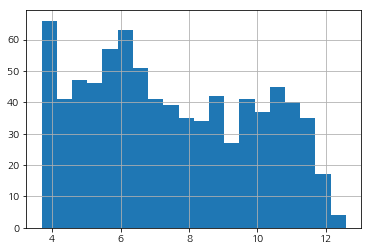

In [20]:
df_in_digit['상영횟수(log)'].hist(bins=20)

### 스크린수 분포

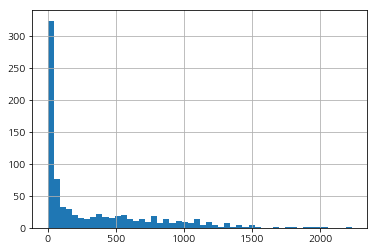

In [26]:
df_in_digit['스크린수'].hist(bins=50)

In [24]:
df_in_digit['스크린수(log)'] = df_in_digit['스크린수'].apply(lambda x: np.log(x))

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log)
478,프레스,20162986.0,2017-11-30,1478000,0.0,1493000,362,365,4,80,0,2017,11,30,3,4.382027,1.386294


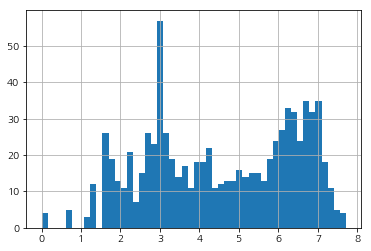

In [27]:
df_in_digit['스크린수(log)'].hist(bins=50)

스크린수보다 상영횟수가 더 불균형함

### 상영횟수(log) 기준으로 나누기
상영횟수(log) | 상영횟수 등급
-|-
0 < x <= 2 | 1
2 < x <= 4 | 2
4 < x <= 6 | 3
6 < x <= 8 | 4
8 < x <= 10 | 5
10 < x <= 12 | 6

In [29]:
df_in_digit[df_in_digit['상영횟수(log)'] == 0]

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log)


In [32]:
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 12, '상영횟수등급'] = 6
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 10, '상영횟수등급'] = 5
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 8, '상영횟수등급'] = 4
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 6, '상영횟수등급'] = 3
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 4, '상영횟수등급'] = 2
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 2, '상영횟수등급'] = 1

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log),상영횟수등급
274,브링 홈: 아버지의 땅,20133071.0,2016-09-01,117372200,0.0,117372200,15025,15025,36,547,0,2016,9,1,3,6.304449,3.583519,4.0


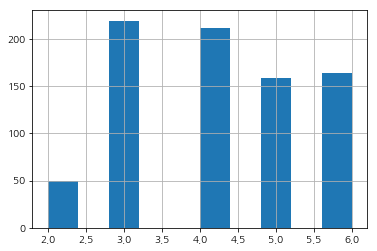

In [33]:
df_in_digit['상영횟수등급'].hist()

In [34]:
df_in_digit[df_in_digit['상영횟수등급'] == 6]['영화명']

2                   허삼관
3                오늘의 연애
7               강남 1970
14                  쎄시봉
15     조선명탐정 : 사라진 놉의 딸
20               순수의 시대
21                  헬머니
23                 살인의뢰
27                   스물
33                 장수상회
40                차이나타운
48               악의 연대기
51                   간신
52                  무뢰한
61                 극비수사
63                 연평해전
70                   손님
86               미쓰 와이프
89              뷰티 인사이드
101                  사도
106          탐정 : 더 비기닝
110              성난 변호사
119           특종: 량첸살인기
120                 더 폰
124                그놈이다
129              검은 사제들
138                내부자들
140          열정같은소리하고있네
157                  대호
158                히말라야
             ...       
661                스윙키즈
662                 마약왕
665           PMC: 더 벙커
667                 말모이
668              내안의 그놈
677                  뺑반
681                  증인
683                 사바하
685          항거:유관순 이야기
695                   돈
696             

상영횟수log 컬럼으로 등급을 나눴더니, log 스케일의 특성에 따라 상영횟수가 늘어날수록 차이가 큰 영화들이 같은 등급 내 포함된다

-> 상영횟수 칼럼으로 다시 나눠서 보기

상영횟수 | 상영횟수 등급
-|-
0 < x <= 100 | 1
2 < x <= 1000 | 2
4 < x <= 10_000 | 3
6 < x <= 30_000 | 4
8 < x <= 70_000 | 5
10 < x <= 100_000 | 6

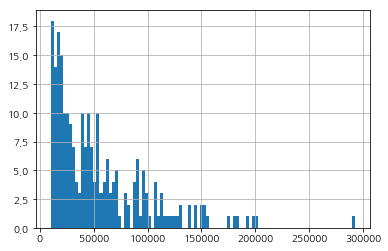

In [50]:
df_in_digit[df_in_digit['상영횟수'] > 10000]['상영횟수'].hist(bins=100)

In [40]:
df_in_digit[df_in_digit['상영횟수'] > 100_000]

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log),상영횟수등급
27,스물,20148845.0,2015-03-25,23563421686,2.7,23563421686,3044811,3044811,926,100161,0,2015,3,25,2,11.514534,6.830874,6.0
63,연평해전,20134798.0,2015-06-24,45563228330,5.2,45563228330,6043784,6043784,1013,114450,0,2015,6,24,2,11.647893,6.920672,6.0
75,암살,20148851.0,2015-07-22,98463132781,11.2,98463132781,12705700,12705700,1519,175185,1,2015,7,22,2,12.073598,7.325808,NaN
79,베테랑,20148048.0,2015-08-05,105168155250,12.0,105168155250,13414009,13414009,1115,199231,0,2015,8,5,2,12.202220,7.016610,NaN
101,사도,20148846.0,2015-09-16,48842902501,5.6,48842902501,6246849,6246849,1210,124246,0,2015,9,16,2,11.730019,7.098376,6.0
129,검은 사제들,20145503.0,2015-11-05,42405282092,4.8,42405282092,5442128,5442128,1109,131155,0,2015,11,5,3,11.784135,7.011214,6.0
138,내부자들,20149314.0,2015-11-19,56465665657,6.4,56465665657,7055332,7055332,1129,152265,0,2015,11,19,3,11.933378,7.029088,6.0
178,검사외전,20145507.0,2016-02-03,77320403264,8.3,77320403264,9707581,9707581,1812,153532,0,2016,2,3,2,11.941664,7.502186,6.0
231,곡성,20140194.0,2016-05-12,55863520382,6.0,55863520382,6879908,6879908,1485,130322,0,2016,5,12,3,11.777764,7.303170,6.0
259,부산행,20156564.0,2016-07-20,93178283048,10.0,93178283048,11565479,11565479,1788,151315,0,2016,7,20,2,11.927119,7.488853,6.0


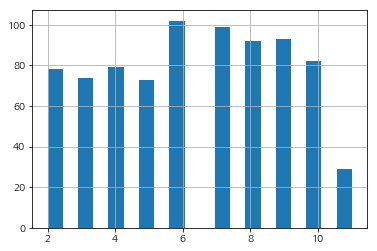

In [62]:
# 간격 줄이기
df_in_digit.loc[df_in_digit['상영횟수'] <= 100_000, '상영횟수등급'] = 11
df_in_digit.loc[df_in_digit['상영횟수'] <= 70_000, '상영횟수등급'] = 10
df_in_digit.loc[df_in_digit['상영횟수'] <= 30_000, '상영횟수등급'] = 9
df_in_digit.loc[df_in_digit['상영횟수'] <= 10_000, '상영횟수등급'] = 8
df_in_digit.loc[df_in_digit['상영횟수'] <= 3_000, '상영횟수등급'] = 7
df_in_digit.loc[df_in_digit['상영횟수'] <= 1_000, '상영횟수등급'] = 6
df_in_digit.loc[df_in_digit['상영횟수'] <= 500, '상영횟수등급'] = 5
df_in_digit.loc[df_in_digit['상영횟수'] <= 300, '상영횟수등급'] = 4
df_in_digit.loc[df_in_digit['상영횟수'] <= 150, '상영횟수등급'] = 3
df_in_digit.loc[df_in_digit['상영횟수'] <= 70, '상영횟수등급'] = 2
df_in_digit.loc[df_in_digit['상영횟수'] <= 30, '상영횟수등급'] = 1

df_in_digit['상영횟수등급'].hist(bins=20)

In [66]:
df_in_digit.groupby(['상영횟수등급'])['F-rated'].mean()

상영횟수등급
2.0     0.602564
3.0     0.554054
4.0     0.544304
5.0     0.849315
6.0     0.656863
7.0     0.878788
8.0     0.750000
9.0     0.602151
10.0    0.548780
11.0    0.586207
Name: F-rated, dtype: float64

에로영화가 많은 2~4등급을 지나면 F-rated 가 올라가다가 8등급을 기점으로 다시 줄어든다

In [85]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우', '배역명',
       '영화코드', '배우코드', '주연배우', '역할_배우', '배우성별', '작가', '작가코드', '대표작가',
       '역할_시나리오(각본)', '작가성별', 'F-rated', '감독코드', '대표감독', '역할_감독', '감독성별'],
      dtype='object')

In [89]:
# df_in_digit = df_in_digit.merge(df[['영화코드', '장르']], how='left', on='영화코드')
# df_in_digit = df_in_digit.merge(df[['영화코드', '등급']], how='left', on='영화코드')
# df_in_digit = df_in_digit.drop(['장르_x', '장르_y'], axis=1)

# df_in_digit[df_in_digit['상영횟수등급'] == 2]['장르'].value_counts()
# df_in_digit[df_in_digit['상영횟수등급'] == 2][['영화명', '장르']]

df_in_digit[df_in_digit['상영횟수등급'] == 2]['등급'].value_counts()
df_in_digit.groupby(['상영횟수등급', '등급'])['영화명'].size()

상영횟수등급  등급      
2.0     12세이상관람가    13
        15세이상관람가    18
        전체관람가        6
        청소년관람불가     41
3.0     12세이상관람가    21
        15세이상관람가    16
        전체관람가       11
        청소년관람불가     26
4.0     12세이상관람가    20
        15세이상관람가    30
        전체관람가        9
        청소년관람불가     20
5.0     12세이상관람가    26
        15세이상관람가    23
        전체관람가       19
        청소년관람불가      5
6.0     12세이상관람가    27
        15세이상관람가    40
        전체관람가       28
        청소년관람불가      7
7.0     12세이상관람가    20
        15세이상관람가    30
        전체관람가       34
        청소년관람불가     15
8.0     12세이상관람가    15
        15세이상관람가    41
        전체관람가       24
        청소년관람불가     12
9.0     12세이상관람가    21
        15세이상관람가    44
        전체관람가       14
        청소년관람불가     14
10.0    12세이상관람가    21
        15세이상관람가    44
        전체관람가        3
        청소년관람불가     14
11.0    12세이상관람가    16
        15세이상관람가     9
        전체관람가        1
        청소년관람불가      3
Name: 영화명, dtype: int64

<Figure size 1152x432 with 0 Axes>

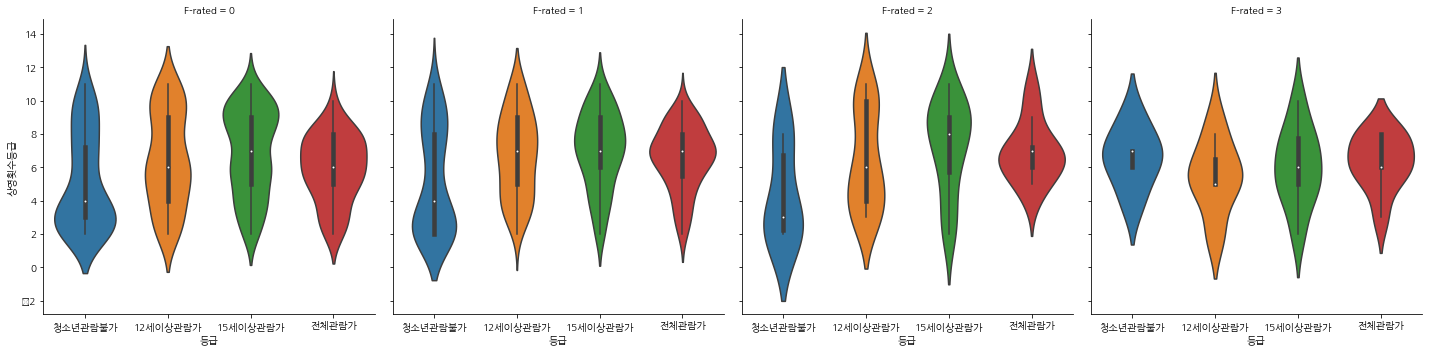

In [108]:
plt.figure(figsize=[16, 6])

sns.catplot(x='등급', col='F-rated', y='상영횟수등급',kind='violin', data=df_in_digit)
plt.show()

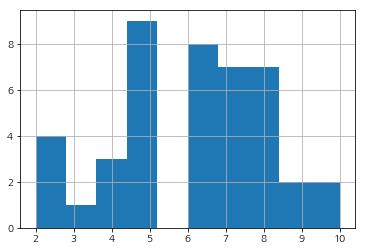

In [111]:
df_in_digit[df_in_digit['F-rated'] == 3]['상영횟수등급'].hist()

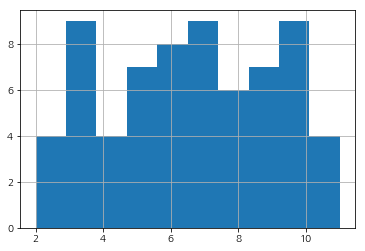

In [112]:
df_in_digit[df_in_digit['F-rated'] == 2]['상영횟수등급'].hist()

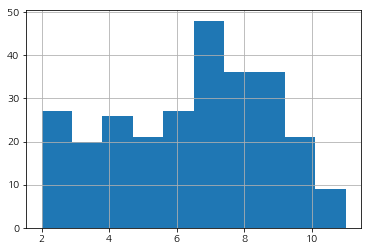

In [113]:
df_in_digit[df_in_digit['F-rated'] == 1]['상영횟수등급'].hist()

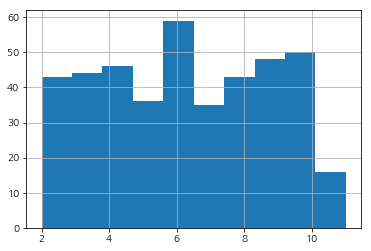

In [114]:
df_in_digit[df_in_digit['F-rated'] == 0]['상영횟수등급'].hist()

# films.csv 에서 감독 작가 Null 값 확인